## HR data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import data

In [2]:
df = pd.read_csv('Final_data.csv')
df.head()

,Sheet Name,Employee Code,Name,Month,Day,Value
0,Apr 2022,Atq -331,Jonah Hamilton,April,1,HPL
1,Apr 2022,Atq -334,Boston Morse,April,1,P
2,June 2022,Atq -334,Boston Morse,June,1,P
3,June 2022,Atq -334,Charity Singleton,June,1,P
4,Apr 2022,Atq -335,Madelynn Gray,April,1,P


### Replacing column name

In [3]:

df.columns = ['sheet_name', 'employee_code', 'name', 'month', 'day', 'value']

In [4]:
df.shape

(6492, 6)

In [5]:
df.value.unique()

array(['HPL', 'P', 'WFH', 'LWP', 'HML', 'SL', 'PL', 'HWFH', 'HSL', 'ML',
       'WO', 'HLWP', 'FFL', 'BL', 'BRL'], dtype=object)

In [6]:
df.month.unique()

array(['April', 'June', 'May'], dtype=object)

#### We have already tansformed the data in power Query. So no NAN values..etc handling so now directly moving towards the observations.

# Observations / Inferences

### Ques - 1

Trend of employee's Work From Home(WFH) scenario
   - Preference of WFH by month.
   - Employees who took max number of WFH?
   - WFH percentage by month?

Now,
 - We are interested in only WFH value.
 - Firstly we want the value WFH by days of all the employees.
 - Then will generalize this only month code for all inorder to see for all the remaining months.
 - Then w'll also check for the employees who opted for WFH at max. 
 - For WFH% we need:
     - Total present = "P" + "WFH" + ("HWFH")/2
     - HWFH will only marked as 1/2 day present
   - So now will find the % of WFH out of total present employee this way we can also find the preference of the employee. 

In [7]:
# Now Count of WFH by month and by day

month_list = df.month.unique()
wfh_day = []
wfh_value_list = []
month = []
employe_name =[]
employe_code = []

for i in month_list:

    m = df.groupby(['month']).get_group(i)

    df_wfh = m.groupby(['value']).get_group('WFH')
    
    wfh_day.append(df_wfh.day.unique())
    
    for j in df_wfh.day.unique():
        
        x = df_wfh.groupby('day').get_group(j)
        wfh_value = x.value.value_counts()
        emp_name_value = x.name.values
        emp_code_value = x.employee_code.values
        
        employe_name.append(emp_name_value)
        employe_code.append(emp_code_value)
        
        wfh_value_list.append(wfh_value[0])
        
        month.append(i)

        
# TWO METHOD TO UNPACK LIST OF LIST        
        
x1 = wfh_day[0]
x2 = wfh_day[1]
x3 = wfh_day[2]
final_wfh_list = [*x1, *x2, *x3]

# [or]

# this is comprehension method
employee_name_list = [x for l in employe_name for x in l]
# print(employee_name_list)

# this is comprehension method
employee_code_list = [x for l in employe_code for x in l]
# print(employee_code_list)




In [8]:
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(employee_code_list, employee_name_list, month, final_wfh_list, wfh_value_list))

wfh_df= pd.DataFrame(list_of_tuples,
                  columns=['employee_code','name','month', 'day', 'WFH_count'])
wfh_df


,employee_code,name,month,day,WFH_count
0,Atq -382,Gustavo Ritter,April,1,7
1,Atq -396,Joel Cruz,April,4,7
2,Atq -405,Chris Frye,April,5,7
3,Atq -430,Maximus Mckenzie,April,6,4
4,Atq -443,Lyric Bartlett,April,7,6
...,...,...,...,...,...
60,Atq -396,Joel Cruz,May,25,9
61,Atq -430,Maximus Mckenzie,May,26,10
62,Atq -455,Caylee Meadows,May,27,9
63,Atq -458,Jessie Carrillo,May,30,6


### Employees who opted for maximum number of WFH 

In [9]:
wfh_df.employee_code.unique()

array(['Atq -382', 'Atq -396', 'Atq -405', 'Atq -430', 'Atq -443',
       'Atq -452', 'Atq -485', 'Atq -331', 'Atq -393', 'Atq -411',
       'Atq -398', 'Atq -369', 'Atq -426', 'Atq -419', 'Atq -467',
       'Atq -368', 'Atq -408', 'Atq -335', 'Atq -455', 'Atq -458',
       'Atq -484'], dtype=object)

In [10]:
wfh_df.groupby('employee_code').size()

employee_code
Atq -331     2
Atq -335     1
Atq -368     2
Atq -369     1
Atq -382    11
Atq -393     2
Atq -396    10
Atq -398     1
Atq -405     4
Atq -408     1
Atq -411     1
Atq -419     1
Atq -426     1
Atq -430    11
Atq -443     1
Atq -452     1
Atq -455     1
Atq -458     1
Atq -467     1
Atq -484     1
Atq -485    10
dtype: int64

### Observation:
 - Employee code who opted for maximum no.of WFH:
     - Atq - 382
     - Atq - 396
     - Atq - 430
     - Atq - 485

#### Work From line graph of  all the months

<AxesSubplot:title={'center':'June month WFH'}, xlabel='day', ylabel='WFH count'>

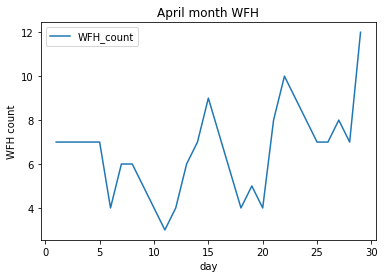

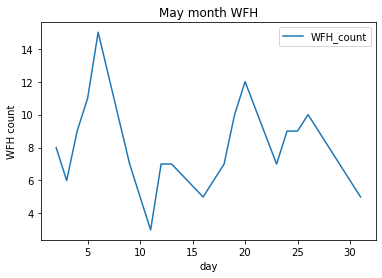

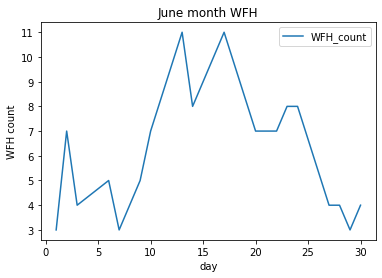

In [11]:
apr_df = wfh_df.groupby('month').get_group('April')
may_df = wfh_df.groupby('month').get_group('May')
june_df = wfh_df.groupby('month').get_group('June')


apr_df.plot(x = 'day' , y = 'WFH_count', kind = 'line', title = 'April month WFH', ylabel = 'WFH count')
may_df.plot(x = 'day' , y = 'WFH_count', kind = 'line', title = 'May month WFH', ylabel = 'WFH count')
june_df.plot(x = 'day' , y = 'WFH_count', kind = 'line', title = 'June month WFH', ylabel = 'WFH count')


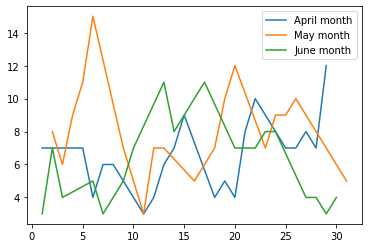

In [12]:
plt.plot(apr_df['day'], apr_df['WFH_count'], label = 'April month')
plt.plot(may_df['day'], may_df['WFH_count'], label = 'May month')
plt.plot(june_df['day'], june_df['WFH_count'], label = 'June month')
plt.legend()
plt.show()

### Observation:

 - Most of the WFH is applied between (10th to 25th).
 - A sudden hike in the May month during (1st to 10th) was bcz of festivals same reason was in the month of April during (29th to 30th).
 

### Total Present and WFH%

In [13]:
wfh_percent_list = []


for i in month_list:
    print("\n")
    print("Month: ", i)
    print("\n")
    month = df.groupby('month').get_group(i)
    
    p1 = month.groupby('value').get_group("P")
    p2 = month.groupby('value').get_group("WFH")
    p3 = month.groupby('value').get_group("HWFH")
    
    p_count = p1.day.count()     # count as 1
    wfh_count = p2.day.count()   # count as 1
    hwfh_count = (p3.day.count()) / 2  # count as 0.5

    print('Present(P) count: ',p_count )
    print('Work From Home(WFH) count: ',wfh_count )
    print('Half Work From Home(HWFH) count: ',hwfh_count )

    
    total_present = p_count + wfh_count + hwfh_count
    print("Total present count: ", total_present)
    
    # WFH% of current month (i)
    wfh_percent = (wfh_count / total_present) * 100
    print("WFH pecentage(%): ", round(wfh_percent,2))
    
    wfh_percent_list.append(round(wfh_percent,2))   
    



Month:  April


Present(P) count:  1387
Work From Home(WFH) count:  138
Half Work From Home(HWFH) count:  0.5
Total present count:  1525.5
WFH pecentage(%):  9.05


Month:  June


Present(P) count:  849
Work From Home(WFH) count:  139
Half Work From Home(HWFH) count:  1.5
Total present count:  989.5
WFH pecentage(%):  14.05


Month:  May


Present(P) count:  1375
Work From Home(WFH) count:  173
Half Work From Home(HWFH) count:  1.0
Total present count:  1549.0
WFH pecentage(%):  11.17


#### Plotting the above data

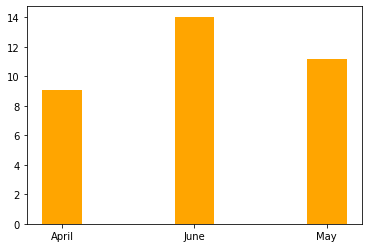

In [14]:


y = wfh_percent_list
x = month_list
plt.bar(x, y, color = 'orange', width = 0.3)
plt.show()



 ## Ques 1- SUMMARY :
  
 - Most of the WFH is applied between (10th to 25th).
 - A sudden hike in the May month during (1st to 10th) was bcz of festivals same reason was in the month of April during (29th to 30th). 
    
 
 - Employee code who opted for maximum no.of WFH:
     - Atq - 382
     - Atq - 396
     - Atq - 430
     - Atq - 485
 
 
 -  preference of WFH for the employee by month:
     - April = 9.04%
     - May = 11.17%     
     - June = 14.05%

     

### Ques - 2

Finding percentage of Sick leave by months 


So for this we need:
 - Total working days in each month = total days - (Weekly Off(WO) + Holidays Off (HO))
 - now calculate Out of total working day how much is the sick leave. 


In [29]:


ho_count = 0
sickleave_list = []



for i in month_list:
    
    print('Month: ',i)
    # Month
    current_month = df.groupby('month').get_group(i)
    total_day_month = len(current_month.day)
    print('total days in month: ',total_day_month)
    
    # WO count
    wo = current_month.groupby('value').get_group('WO')  #value contain 'WO' in month 'i'
    wo_count = len(wo.day)
    print('WO count: ',wo_count)
    
    # total working day
    total_working_days = total_day_month - (wo_count + ho_count)
    print('total_working_days: ', total_working_days)

    
    # half sick leave(HSL) count
    s1 = current_month.groupby('value').get_group('HSL')
    hsl_count = (s1.day.count()) / 2       # Half Sick leave as 0.5
    print("Half Sick leave count: ", hsl_count)
    
    # Sick leave(SL) count
    s2 = current_month.groupby('value').get_group('SL')
    sl_count = s2.day.count()            # Full Sick Leave as 1
    print("Sick leave count: ", sl_count)
    
    # Total Sick leave = HSL + SL
    total_sick_leave = hsl_count + sl_count
    print("Total Sick leave count: ", total_sick_leave)
    
    
    # % of sick leave
    perce_SL = (total_sick_leave / total_working_days) * 100
    print('Sick leave percent: ', round(perce_SL,2))   # round off sick leave percentage to 2

    print('\n')

#     store all sick leave percentage value into list
    sickleave_list.append(round(perce_SL,2))

print(sickleave_list)
    

Month:  April
total days in month:  2333
WO count:  711
total_working_days:  1622
Half Sick leave count:  1.0
Sick leave count:  6
Total Sick leave count:  7.0
Sick leave percent:  0.43


Month:  June
total days in month:  1753
WO count:  662
total_working_days:  1091
Half Sick leave count:  3.0
Sick leave count:  9
Total Sick leave count:  12.0
Sick leave percent:  1.1


Month:  May
total days in month:  2406
WO count:  680
total_working_days:  1726
Half Sick leave count:  5.0
Sick leave count:  24
Total Sick leave count:  29.0
Sick leave percent:  1.68


[0.43, 1.1, 1.68]


<BarContainer object of 3 artists>

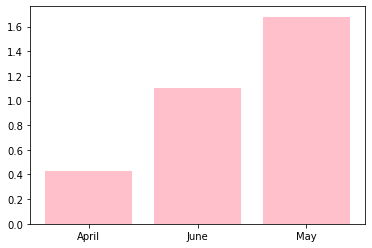

In [30]:
x = ['April', 'June', 'May']     #[or] month_list    
y = [0.43, 1.1, 1.68]        #[or] sickleave_list

plt.bar(x, y, color = 'pink')

## Observation:
 - There was a drastic sick leave taken by the employess in the month of May-2022
 - Observering WFH graph of 'May-2022' and Sick leave graph, posssible reason for this can be a pandemic, as it was expected that from May-2022 there will going to be the growth of covid cases and it went to its peak by mid of july.